# Decision Tree Learning: Prosper Loan Dataset

A decision tree a learned set of rules that allows us to make decisions on data.

We are going to look at the prosper loan dataset.  This dataset shows a history of loans made by Prosper.

In [0]:
%matplotlib inline
import pandas as pd
import time

## Step 1: Load the Data

In [2]:
## small file, start with this
datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data-sample.csv"
## this is a large file
#datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data.csv.gz"

t1 = time.perf_counter()
data = pd.read_csv(datafile)
t2 = time.perf_counter()

print("read {:,} records in {:,.2f} ms".format(len(data), (t2-t1)*1000))
# schema
#data.dtypes

read 200 records in 126.07 ms


In [3]:
data.head()

Term  LoanStatus  BorrowerRate  ProsperRating (numeric)  ProsperScore  \
0    36           1        0.0789                      7.0           9.0   
1    36           0        0.1450                      4.0           6.0   
2    36           1        0.1707                      4.0           6.0   
3    36           1        0.0830                      7.0           9.0   
4    36           1        0.1550                      4.0           6.0   

  ListingCategory BorrowerState EmploymentStatus  EmploymentStatusDuration  \
0            Debt            VA         Employed                       9.0   
1         Unknown            OR        Part-time                      15.0   
2            Debt            UT        Full-time                      22.0   
3           Other            VA        Full-time                     175.0   
4            Debt            IL        Full-time                      18.0   

   IsBorrowerHomeowner       ...         ProsperPaymentsOneMonthPlusLate  \
0                 True       ...                                     0.0   
1                False       ...                                     0.0   
2                 True       ...                                     0.0   
3                 True       ...                                     0.0   
4                False       ...                                     0.0   

   ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  LoanOriginalAmount  \
0                       0.0                          0.0               17300   
1                       0.0                          0.0                9500   
2                       0.0                          0.0                7200   
3                       0.0                          0.0                4500   
4                       0.0                          0.0                8000   

   MonthlyLoanPayment  Recommendations  InvestmentFromFriendsCount  \
0              541.24                0                           0   
1              327.00                0                           0   
2              256.95                0                           0   
3              141.64                0                           0   
4              277.14                0                           0   

   InvestmentFromFriendsAmount  Investors  YearsWithCredit  
0                          0.0        169               20  
1                          0.0        171               23  
2                          0.0        216               16  
3                          0.0        151               18  
4                          0.0        140               14  

[5 rows x 46 columns]

In [4]:
## TODO : select a few columns 
## start with: 'LoanStatus',  'EmploymentStatus', 'CreditScore', 'StatedMonthlyIncome', 'ListingCategory'
## we can add more later

select_columns = ['LoanStatus', 'EmploymentStatus', 'CreditScore', 'StatedMonthlyIncome', 'ListingCategory']

## Note : vector columns can only have Numbers, don't include Categorical columns here
## And definitely not 'LoanStatus'  (if you are curiuos include and see what happens!)
vector_columns = [ 'EmpIndex', 'CreditScore', 'StatedMonthlyIncome', 'CategoryIndex']

select_columns



['LoanStatus',
 'EmploymentStatus',
 'CreditScore',
 'StatedMonthlyIncome',
 'ListingCategory']

In [6]:
## TODO : Extract only the columns we are interested in
## Hint : 'select_columns'
prosper = data[select_columns]
prosper.head()

LoanStatus EmploymentStatus  CreditScore  StatedMonthlyIncome  \
0           1         Employed        740.0         10416.666667   
1           0        Part-time        760.0             0.000000   
2           1        Full-time        680.0          5000.000000   
3           1        Full-time        800.0          5000.000000   
4           1        Full-time        600.0          2625.000000   

  ListingCategory  
0            Debt  
1         Unknown  
2            Debt  
3           Other  
4            Debt

## Step 2 : Clean Data

In [7]:
## TODO :  Drop any NA, null values.  
## Hint : Using `.na.drop()`
prosper_clean = prosper.dropna()

print("Original record count {:,}, cleaned records count {:,},  dropped {:,}"\
      .format(len(prosper), len(prosper_clean), 
              (len(prosper) - len(prosper_clean))))
prosper_clean.head()

Original record count 200, cleaned records count 200,  dropped 0


LoanStatus EmploymentStatus  CreditScore  StatedMonthlyIncome  \
0           1         Employed        740.0         10416.666667   
1           0        Part-time        760.0             0.000000   
2           1        Full-time        680.0          5000.000000   
3           1        Full-time        800.0          5000.000000   
4           1        Full-time        600.0          2625.000000   

  ListingCategory  
0            Debt  
1         Unknown  
2            Debt  
3           Other  
4            Debt

## Look at some summary data

**=> Q : What does that say about the cardinality of these categorical columns?**


In [8]:
## TODO : Look at some summaries
## We are going to group counts by 'LoanStatus',  'EmploymentStatus' ,   'ListingCategory'

print(prosper_clean.groupby('LoanStatus').size())
print(prosper_clean.groupby('EmploymentStatus').size())
print(prosper_clean.groupby('ListingCategory').size())

## Question : What does that say about the cardinality of these categorical columns? *

LoanStatus
0     64
1    136
dtype: int64
EmploymentStatus
Employed          73
Full-time        106
Not employed       1
Other              1
Part-time          6
Retired            2
Self-employed     11
dtype: int64
ListingCategory
Auto         12
Business     12
Debt         81
Household     1
Medical       1
Other        22
Personal     12
Reno          9
Student       3
Taxes         5
Unknown      42
dtype: int64


## Step 3: Converting Categorical columns 

Convert categorical columns to numeric.   
Here let's convert **EmploymentStatus** column

In [9]:
# use pd.factorize on EmploymentStatus

## use pd.factorize on ListingCategory

prosper_clean['EmploymentStatusFactor'] = pd.factorize(prosper_clean['EmploymentStatus'])[0]

prosper_clean['ListingCategoryFactor'] = pd.factorize(prosper_clean['ListingCategory'])[0]

prosper_clean.drop(['EmploymentStatus','ListingCategory'], axis = 1, inplace = True)

prosper_clean.head()


LoanStatus  CreditScore  StatedMonthlyIncome  EmploymentStatusFactor  \
0           1        740.0         10416.666667                       0   
1           0        760.0             0.000000                       1   
2           1        680.0          5000.000000                       2   
3           1        800.0          5000.000000                       2   
4           1        600.0          2625.000000                       2   

   ListingCategoryFactor  
0                      0  
1                      1  
2                      0  
3                      2  
4                      0

## Step 4: Build feature vectors 

TODO: Build feature Vectors out of the numeric columns.

In [16]:
features = prosper_clean.drop('LoanStatus', axis = 1)
#features.head()
label = prosper_clean.LoanStatus
label.head()

0    1
1    0
2    1
3    1
4    1
Name: LoanStatus, dtype: int64

## Step 5: Split Data into training and test.

We will split our the data up into training and test.  (You know the drill by now).

**=> TODO: Split dataset into 70% training, 30% validation**


In [17]:
## TODO :  Split the data into 70% training and 30% test sets 
## Hint : 0.7   , 0.3
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size=.3)
print("training set x = " , len(train_x))
print("training set y = " , len(train_y))
print("test set x = " , len(test_x))
print("testing set y = " , (len(test_y)))

training set x =  140
training set y =  140
test set x =  60
testing set y =  60


## Step 6: Decision Tree
** Q : How many nodes does the tree have? **

In [18]:
from sklearn.tree import DecisionTreeClassifier
##TODO: Create a DecisionTree model with 5000 Maxbins
dt = DecisionTreeClassifier()

t1 = time.perf_counter()
## TODO : train with training data set
## Hint : training
tree_model = dt.fit(train_x, train_y)
t2 = time.perf_counter()

## TODO : Notice the time took to train
print("traind on {:,} records using {:,} features in {:,.2f} ms".\
      format(len(train_x), len(train_y), (t2-t1)*1000))

traind on 140 records using 140 features in 6.13 ms


In [20]:
print(dt.tree_.node_count) #get the node count.
print(dt.tree_.children_left[node]) #where node is some integer
print(dt.tree_.children_right[node])
print(dt.tree_.threshold[node])

101


NameError: ignored

In [21]:
## TODO : create predictions using test dataset
## Hint : test
predictions = tree_model.predict(test_x)
predictions

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

## Step 7: Print out the Tree

In [0]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(tree_model, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('tree.png')

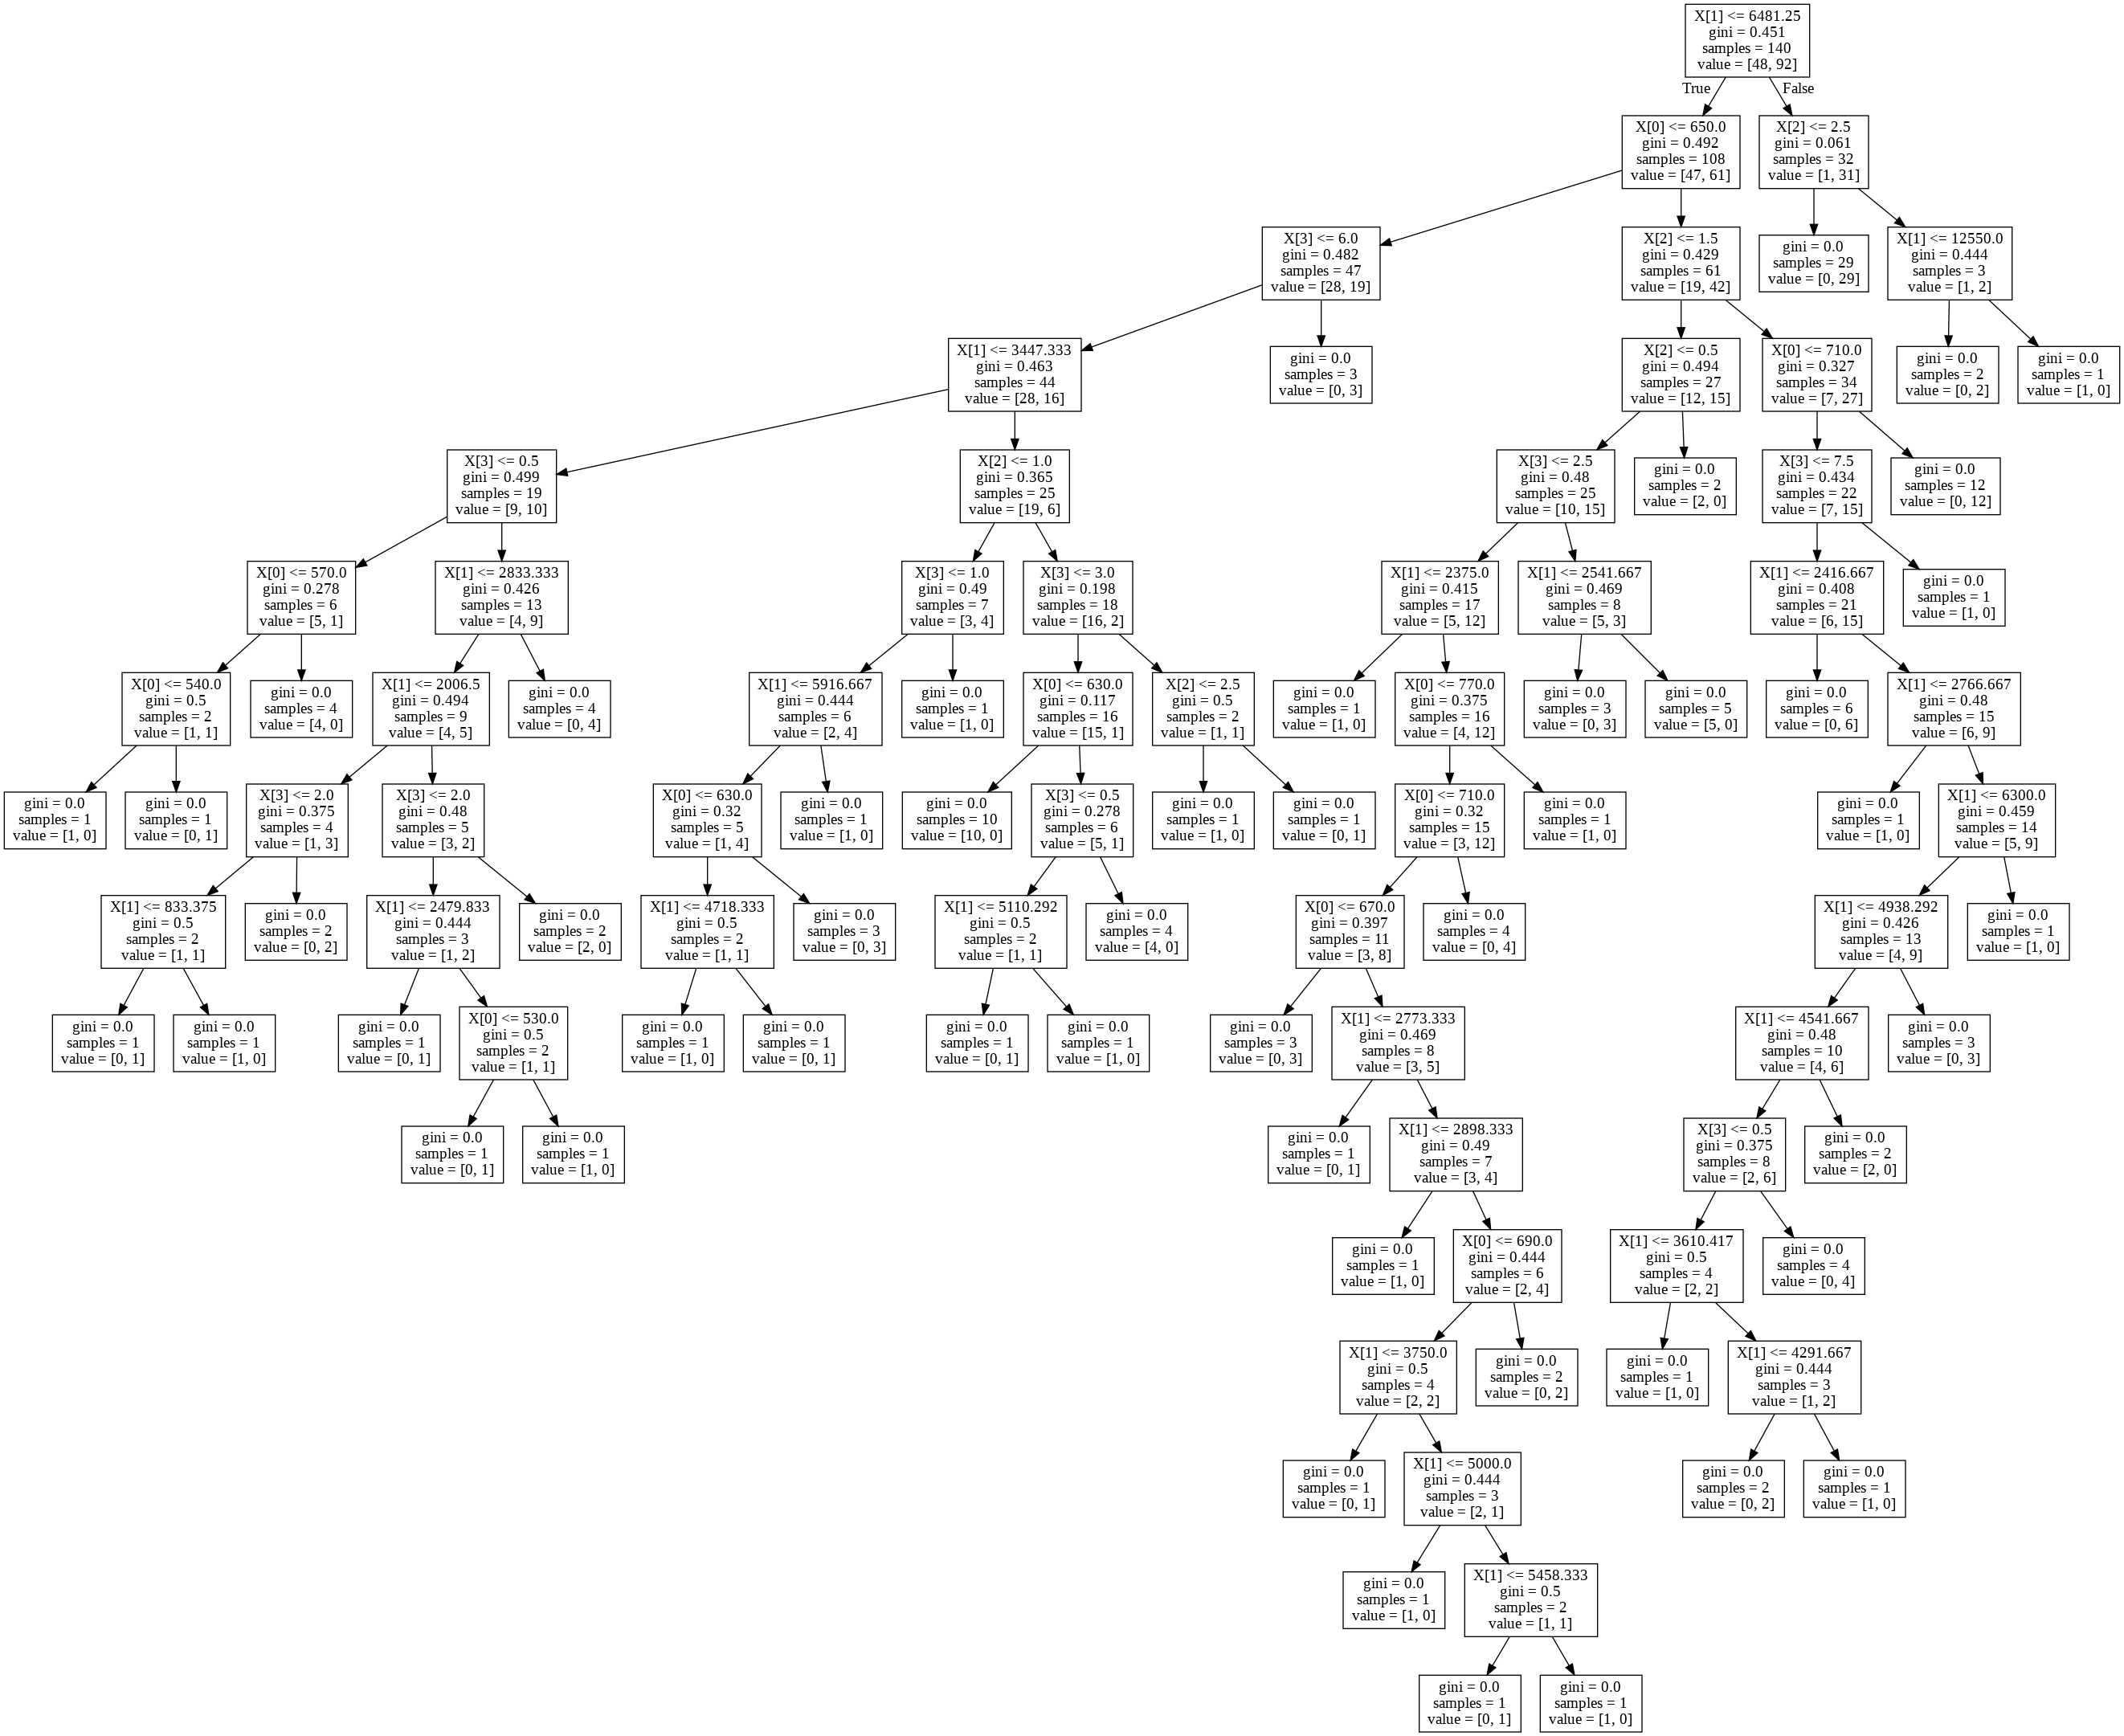

In [24]:
# View the Image
from IPython.display import Image
Image("tree.png")

## Step 7: Evaluate the model.

Let us check to see how the model did, using accuracy as a measure.

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.5833333333333334

## Step 8: Improve Accuracy

### Add more data
In Step-1 change the 'datafile' to the full dataset.  
And see how the accuracy above changes

### Add more features
Look at the schema of the full dataset.  Are there any columns you want to add

In [0]:

datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data.csv.gz"

df = pd.read_csv(datafile)


In [28]:
df.columns

Index(['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperScore', 'ListingCategory', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScore',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed

In [29]:
select_columns = ['LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperScore', 'ListingCategory', 'EmploymentStatus', 'CreditScore',
       'CurrentCreditLines', 'OpenCreditLines',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'CurrentDelinquencies',
       'AmountDelinquent', 'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'Recommendations','YearsWithCredit']
select_columns

['LoanStatus',
 'BorrowerRate',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory',
 'EmploymentStatus',
 'CreditScore',
 'CurrentCreditLines',
 'OpenCreditLines',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'Recommendations',
 'YearsWithCredit']

In [30]:
prosper_fulldata = df[select_columns]
prosper_fulldata.head()

LoanStatus  BorrowerRate  ProsperRating (numeric)  ProsperScore  \
0           1        0.1580                      4.0           6.0   
1           1        0.1325                      4.0           6.0   
2           0        0.1435                      5.0           4.0   
3           0        0.3177                      1.0           5.0   
4           1        0.2075                      4.0           6.0   

  ListingCategory EmploymentStatus  CreditScore  CurrentCreditLines  \
0         Unknown    Self-employed        640.0                 5.0   
1         Unknown        Full-time        640.0                 2.0   
2            Debt         Employed        680.0                 9.0   
3       Household            Other        700.0                10.0   
4         Unknown        Full-time        620.0                 4.0   

   OpenCreditLines  OpenRevolvingAccounts       ...         TotalTrades  \
0              4.0                      1       ...                11.0   
1              2.0                      1       ...                 7.0   
2              7.0                      8       ...                20.0   
3              9.0                      5       ...                17.0   
4              4.0                      3       ...                 6.0   

   DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  \
0               0.17          3083.333333                0.0   
1               0.27          1666.666667                0.0   
2               0.18          2416.666667                0.0   
3               0.49          5500.000000                0.0   
4               0.09          3750.000000                0.0   

   ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  LoanOriginalAmount  \
0                       0.0                          0.0                9425   
1                       0.0                          0.0                1000   
2                       0.0                          0.0                4000   
3                       0.0                          0.0                4000   
4                       0.0                          0.0                3000   

   MonthlyLoanPayment  Recommendations  YearsWithCredit  
0              330.43                0               13  
1               33.81                0               14  
2              137.39                0               18  
3              173.71                0               15  
4              112.64                0               11  

[5 rows x 27 columns]

In [31]:
prosper_fulldata['EmploymentStatusFactor'] = pd.factorize(prosper_fulldata['EmploymentStatus'])[0]

prosper_fulldata['ListingCategoryFactor'] = pd.factorize(prosper_fulldata['ListingCategory'])[0]

#prosper_fulldata['IsBorrowerHomeownerFactor'] = pd.factorize(prosper_fulldata['IsBorrowerHomeowner'])[0]

#prosper_fulldata['IncomeVerifiableFactor'] = pd.factorize(prosper_fulldata['IncomeVerifiable'])[0]

#prosper_fulldata.drop(['EmploymentStatus','ListingCategory','IsBorrowerHomeowner','IncomeVerifiable'], axis = 1, inplace = True)

prosper_fulldata.drop(['EmploymentStatus','ListingCategory'], axis = 1, inplace = True)


prosper_fulldata.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

LoanStatus  BorrowerRate  ProsperRating (numeric)  ProsperScore  \
0           1        0.1580                      4.0           6.0   
1           1        0.1325                      4.0           6.0   
2           0        0.1435                      5.0           4.0   
3           0        0.3177                      1.0           5.0   
4           1        0.2075                      4.0           6.0   

   CreditScore  CurrentCreditLines  OpenCreditLines  OpenRevolvingAccounts  \
0        640.0                 5.0              4.0                      1   
1        640.0                 2.0              2.0                      1   
2        680.0                 9.0              7.0                      8   
3        700.0                10.0              9.0                      5   
4        620.0                 4.0              4.0                      3   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months          ...            \
0                         24.0                   3.0          ...             
1                         40.0                   3.0          ...             
2                        290.0                   1.0          ...             
3                        300.0                   0.0          ...             
4                         15.0                   0.0          ...             

   StatedMonthlyIncome  TotalProsperLoans  ProsperPrincipalBorrowed  \
0          3083.333333                0.0                       0.0   
1          1666.666667                0.0                       0.0   
2          2416.666667                0.0                       0.0   
3          5500.000000                0.0                       0.0   
4          3750.000000                0.0                       0.0   

   ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
0                          0.0                9425              330.43   
1                          0.0                1000               33.81   
2                          0.0                4000              137.39   
3                          0.0                4000              173.71   
4                          0.0                3000              112.64   

   Recommendations  YearsWithCredit  EmploymentStatusFactor  \
0                0               13                       0   
1                0               14                       1   
2                0               18                       2   
3                0               15                       3   
4                0               11                       1   

   ListingCategoryFactor  
0                      0  
1                      0  
2                      1  
3                      2  
4                      0  

[5 rows x 27 columns]

In [32]:
features = prosper_fulldata.drop('LoanStatus', axis = 1)
features.head()

BorrowerRate  ProsperRating (numeric)  ProsperScore  CreditScore  \
0        0.1580                      4.0           6.0        640.0   
1        0.1325                      4.0           6.0        640.0   
2        0.1435                      5.0           4.0        680.0   
3        0.3177                      1.0           5.0        700.0   
4        0.2075                      4.0           6.0        620.0   

   CurrentCreditLines  OpenCreditLines  OpenRevolvingAccounts  \
0                 5.0              4.0                      1   
1                 2.0              2.0                      1   
2                 9.0              7.0                      8   
3                10.0              9.0                      5   
4                 4.0              4.0                      3   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  CurrentDelinquencies  \
0                         24.0                   3.0                   2.0   
1                         40.0                   3.0                   3.0   
2                        290.0                   1.0                   0.0   
3                        300.0                   0.0                   0.0   
4                         15.0                   0.0                   1.0   

           ...            StatedMonthlyIncome  TotalProsperLoans  \
0          ...                    3083.333333                0.0   
1          ...                    1666.666667                0.0   
2          ...                    2416.666667                0.0   
3          ...                    5500.000000                0.0   
4          ...                    3750.000000                0.0   

   ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  LoanOriginalAmount  \
0                       0.0                          0.0                9425   
1                       0.0                          0.0                1000   
2                       0.0                          0.0                4000   
3                       0.0                          0.0                4000   
4                       0.0                          0.0                3000   

   MonthlyLoanPayment  Recommendations  YearsWithCredit  \
0              330.43                0               13   
1               33.81                0               14   
2              137.39                0               18   
3              173.71                0               15   
4              112.64                0               11   

   EmploymentStatusFactor  ListingCategoryFactor  
0                       0                      0  
1                       1                      0  
2                       2                      1  
3                       3                      2  
4                       1                      0  

[5 rows x 26 columns]

In [33]:
label = prosper_fulldata.LoanStatus
label.head()

0    1
1    1
2    0
3    0
4    1
Name: LoanStatus, dtype: int64

In [34]:
## TODO :  Split the data into 70% training and 30% test sets 
## Hint : 0.7   , 0.3
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size=.3)
print("training set x = " , len(train_x))
print("training set y = " , len(train_y))
print("test set x = " , len(test_x))
print("testing set y = " , (len(test_y)))

training set x =  34806
training set y =  34806
test set x =  14918
testing set y =  14918


In [35]:
from sklearn.tree import DecisionTreeClassifier
##TODO: Create a DecisionTree model with 5000 Maxbins
dt1 = DecisionTreeClassifier()

t1 = time.perf_counter()
## TODO : train with training data set
## Hint : training
tree_model1 = dt1.fit(train_x, train_y)
t2 = time.perf_counter()

## TODO : Notice the time took to train
print("traind on {:,} records using {:,} features in {:,.2f} ms".\
      format(len(train_x), len(train_y), (t2-t1)*1000))

traind on 34,806 records using 34,806 features in 846.99 ms


In [0]:
predictions = dt1.predict(test_x)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.6222684005898914